In [28]:
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

In [29]:
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path
path.ls()

(#2) [Path('training'),Path('testing')]

In [30]:
fns = get_image_files(path)
fns

(#70000) [Path('training/7/9444.png'),Path('training/7/14605.png'),Path('training/7/13540.png'),Path('training/7/41244.png'),Path('training/7/14832.png'),Path('training/7/11829.png'),Path('training/7/51011.png'),Path('training/7/57526.png'),Path('training/7/48135.png'),Path('training/7/32363.png')...]

In [31]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='training', valid_name='testing'),
    get_y=parent_label,
    item_tfms = [ToTensor(), CropPad(size=34, pad_mode=PadMode.Zeros), RandomCrop(size=28)],
    batch_tfms= [IntToFloatTensor(), Normalize()]
)
#dls = dblock.summary(path)

SuggestedLRs(valley=0.0030199517495930195)

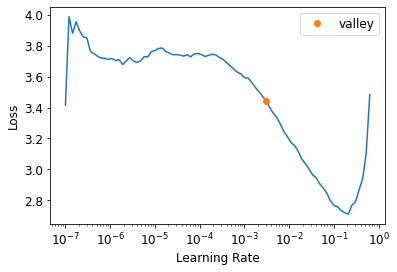

In [32]:
dls = dblock.dataloaders(path)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.lr_find()

In [33]:
dls = dblock.dataloaders(path)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(3, base_lr=1e-2, freeze_epochs=2)

epoch,train_loss,valid_loss,accuracy,time
0,0.698339,0.399670,0.868200,00:55
1,0.258081,0.101813,0.967700,00:53


epoch,train_loss,valid_loss,accuracy,time
0,0.150617,0.049491,0.986100,01:09
1,0.081997,0.032155,0.991000,01:08
2,0.030802,0.019257,0.994400,01:07


In [34]:
learn.export()

In [35]:
modelPath = Path()
modelPath.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [36]:
learn_inf = load_learner(modelPath/'export.pkl')

In [37]:
btn = widgets.FileUpload()
btn

FileUpload(value={}, description='Upload')

In [40]:
pred,pred_idx,probs = learn_inf.predict(PILImage.create(btn.data[-1]))
pred,pred_idx,probs[pred_idx]

('7', tensor(7), tensor(0.9397))